In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
#import netCDF4
import scipy.stats as stats
import scipy
import arviz as az

# Import

In [3]:
#f = netCDF4.Dataset('./stan/lev/outputII_file.nc','r')

In [4]:
df=az.from_netcdf('./stan/lev/outputII_file.nc')

In [5]:
rSlope_chain = np.array(df['posterior']['gamma0'][0])
fSlope_chain = np.array(df['posterior']['beta'][0])

rSlope_chain.shape,fSlope_chain.shape

((500, 288), (500, 288))

In [6]:
rSlope = np.average(rSlope_chain[300:,:],axis=0)
fSlope = np.average(fSlope_chain[300:,:],axis=0)

rSlope.shape,fSlope.shape

((288,), (288,))

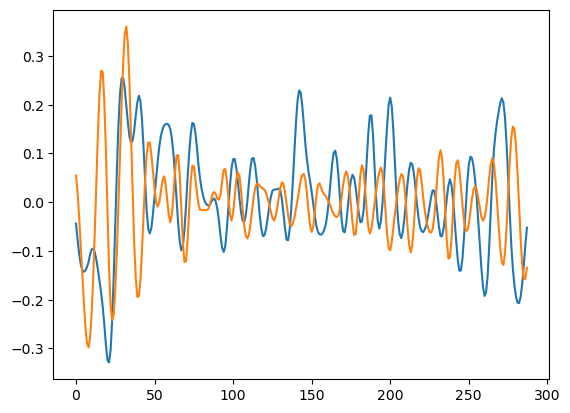

In [7]:
plt.plot(rSlope)
plt.plot(fSlope)

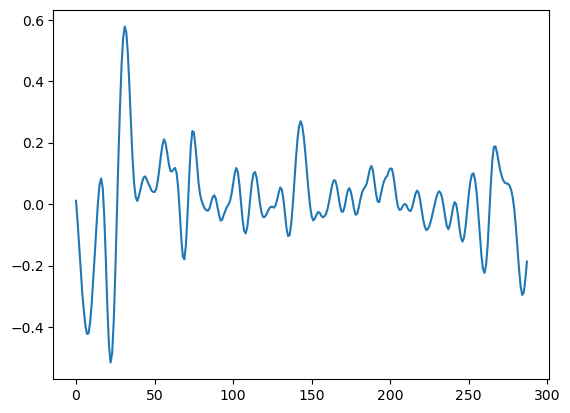

In [8]:
beta = fSlope+rSlope
plt.plot(fSlope+rSlope)

In [9]:
chain_alpha1 = pd.read_csv('chain_fixed.csv')

T01, counts1 = stats.mode(chain_alpha1.iloc[500:,:], axis=0)
T01 = T01.flatten().tolist()

T = np.linspace(1, 288, 288)

In [10]:
df = pd.read_csv('average_curves.csv', index_col='idx')
x = df.iloc[7:,:].T.to_numpy()
y = df.iloc[1, :].T.to_numpy()

y23 = np.copy(y)
y23[y == 1] = 0
y23[y == 2] = 1
y23[y == 3] = 1

In [11]:
df_lev = pd.read_csv('levodopa_data.csv')

x_lev = df.iloc[7:,df_lev['Pat Number'].astype(int)].T.to_numpy()
y_lev = df.iloc[1,df_lev['Pat Number'].astype(int)].T.to_numpy()

y23_lev = np.copy(y_lev)
y23_lev[y_lev == 1] = 0
y23_lev[y_lev == 2] = 1
y23_lev[y_lev == 3] = 1

In [12]:
def prediction(y1,x1,mF,mR):
    for i in range(len(y1)):
        if df_lev.loc[i,'Levodopa Dosis']>4:
            return np.fromfunction(np.vectorize(lambda i: np.dot(x[i,:],mF+mR)), (y1.shape[0],), dtype=int)
        else:
            return np.fromfunction(np.vectorize(lambda i: np.dot(x[i,:],mF)), (y1.shape[0],), dtype=int)

def accuracy(y1,x,mF,mR):
    fitted = prediction(y1,x,mF,mR)
    logit_fitted = scipy.special.expit(fitted)
    labels = np.zeros(len(logit_fitted))
    ones= np.where(fitted >0.5)[0]
    labels[ones] = np.ones(len(ones)) 
    return (np.sum(labels==y1)/len(y1),fitted)

In [13]:
acc,fit=accuracy(y23_lev,x_lev,fSlope,rSlope)

In [14]:
acc

0.7205882352941176

In [15]:
fit

array([ 0.02515973,  0.17454037,  0.51700769,  0.62708756, -0.16387069,
        0.11955437,  0.60983963, -0.13910044,  0.11136336,  0.16639621,
        0.49759795,  0.55640205,  0.44940841,  0.68612227,  0.14454067,
        0.34244925,  0.13186964,  0.27358468, -0.07450945,  0.23648962,
       -0.1966636 ,  0.20747454,  0.28256929, -0.31438046,  0.23331077,
       -0.08147718,  0.19551208,  0.38221922, -0.09183715,  0.35042052,
        0.2961024 ,  0.48101425,  0.28749249,  0.27236196,  0.34235109,
        0.23704173,  0.35073088,  0.26222747, -0.23234342,  0.57840746,
       -0.0063202 ,  0.44072862,  0.51864334,  0.33967515, -0.06295689,
       -0.0477746 ,  0.47517494,  0.69180787, -0.26811186, -0.45490882,
        0.12834185,  0.46041632,  0.02710328,  0.43103426,  0.76089658,
        0.56150011,  0.66467767,  0.37322651,  0.45850274,  0.40138812,
        1.32532343,  0.19402181, -0.10342159,  0.27391753,  0.19497394,
        0.33664842, -0.38456098,  0.79233647,  0.73928378,  0.80